<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# ASSIGNMENT

###  This is a cars dataset having 156 observation and 16 different variables. You have to create a linear regression model using the provided predictor variables for the prediction of sales value of cars.

#### Note: Please run your code step by step as provided in the sheet or else you may face challenges with the code.

### Import the dataset.

In [59]:
import pandas as pd
car = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/car_sales.csv")
car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


### Check the shape of the dataset.

In [41]:
def lr():
    return car.shape 
lr()

(156, 16)

### Check the descriptive stats of the dataset.

In [42]:
def lr():
    return car.describe()
lr()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,52.051742,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,68.907116,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.630000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,27.609000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,65.905500,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### Q 1. Write a code to understand the total count and percentage of missing values.

In [61]:
def lr():
    # Count total missing and sort it 
    tot=car.Sales_in_thousands.isnull().sum()
    print(tot)
    #print(car.isnull().size)
    #print(car.size)
    #print(car.count())
    #print(car.shape)
    print(car.Sales_in_thousands.count())
    # Calucalte percent 
    percent=tot/(car.Sales_in_thousands.count()+tot)*100
    print(percent)
    # concatenate total and percent 
    print("The total missing value is {} and percent is {}% ".format(tot, round(percent, 2)))
    # print missing data assigning a varibale
    tmpdf=car[car['Sales_in_thousands'].isnull()]
    #print(tmpdf)
    # return using your created variable
    return tmpdf
lr()

5
151
3.205128205128205
The total missing value is 5 and percent is 3.21% 


,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
45,Ford,Escort,NaN,7.425,Passenger,12.070,2.0,110,98.4,67.0,174.7,2.468,12.7,30,3/31/2012,44.083709
46,Ford,Mustang,NaN,12.760,Passenger,21.560,3.8,190,101.3,73.1,183.2,3.203,15.7,24,1/31/2012,76.509185
47,Ford,Contour,NaN,8.835,Passenger,17.035,2.5,170,106.5,69.1,184.6,2.769,15.0,25,8/20/2012,67.351011
50,Ford,Crown Victoria,NaN,14.210,Passenger,22.195,4.6,200,114.7,78.2,212.0,3.908,19.0,21,9/26/2011,80.499537
53,Ford,Expedition,NaN,23.575,Car,36.135,4.6,240,119.0,78.7,204.6,4.808,26.0,16,9/14/2012,100.024802


### Q 2. Impute the missing value using "median" groupby Manufacturer. 

In [62]:

def lr():
    # your code here to impute missing value using median and groupby
    #print (car.isnull().sum())
    #print(car.columns)
    #print(car['Sales_in_thousands'].median())
    car['Sales_in_thousands'].fillna(car.groupby("Manufacturer")["Sales_in_thousands"].transform("median"), inplace=True)
    return
lr()
print (car.isnull().sum())
print(car.describe())

Manufacturer          0
Model                 0
Sales_in_thousands    0
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64
       Sales_in_thousands  ...  Power_perf_factor
count          156.000000  ...         156.000000
mean            57.858817  ...          77.128857
std             74.966671  ...          25.084045
min              0.110000  ...          23.276272
25%             14.035000  ...          60.567577
50%             29.213000  ...          72.160636
75%             71.690250  ...          89.623790
max            540.561000  ...         188.144323

[8 rows x 12 columns]


### Q 3. Create a dummy variable for "Vehicle_type"  and  drop the original variable.

In [63]:
car_dummy =pd.DataFrame()                                                           # Creating an empty data frame
def lr(car):
    # your code to create dummies
    print(car['Vehicle_type'].unique())
    vehicle_dummies = pd.get_dummies(car['Vehicle_type'], prefix='Vehicle')
    return vehicle_dummies #your created variable
car_dummy = lr(car)
print(car_dummy)
car=pd.concat([car, car_dummy], axis=1)
car.drop(['Vehicle_type'], axis=1, inplace=True)
car.head()

['Passenger' 'Car']
     Vehicle_Car  Vehicle_Passenger
0              0                  1
1              0                  1
2              0                  1
3              0                  1
4              0                  1
..           ...                ...
151            0                  1
152            0                  1
153            0                  1
154            0                  1
155            0                  1

[156 rows x 2 columns]


,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Vehicle_Car,Vehicle_Passenger
0,Acura,Integra,16.919,16.360,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150,0,1
1,Acura,TL,39.384,19.875,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778,0,1
2,Acura,CL,14.114,18.225,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000,0,1
3,Acura,RL,8.588,29.725,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779,0,1
4,Audi,A4,20.397,22.255,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639,0,1


In [64]:
#car.drop(['Vehicle_Car'], axis=1, inplace=True)
car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Vehicle_Car,Vehicle_Passenger
0,Acura,Integra,16.919,16.360,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150,0,1
1,Acura,TL,39.384,19.875,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778,0,1
2,Acura,CL,14.114,18.225,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000,0,1
3,Acura,RL,8.588,29.725,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779,0,1
4,Audi,A4,20.397,22.255,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639,0,1


### Q 4. Drop the below mentioned variables which will not help in prediction of sales.
``` ['Manufacturer', 'Model', 'Latest_Launch'] ```

In [66]:
def lr(car_dummy):
    # your code to drop the useless variables
    car_dummy.head()
    #car_dummy.drop(['Manufacturer', 'Model', 'Latest_Launch'], axis=1, inplace=True)
    return car_dummy# your created variable

car_dummy = lr(car)
print (car_dummy)

    Manufacturer    Model  ...  Vehicle_Car  Vehicle_Passenger
0          Acura  Integra  ...            0                  1
1          Acura       TL  ...            0                  1
2          Acura       CL  ...            0                  1
3          Acura       RL  ...            0                  1
4           Audi       A4  ...            0                  1
..           ...      ...  ...          ...                ...
151        Volvo      V40  ...            0                  1
152        Volvo      S70  ...            0                  1
153        Volvo      V70  ...            0                  1
154        Volvo      C70  ...            0                  1
155        Volvo      S80  ...            0                  1

[156 rows x 17 columns]


In [67]:
car_dummy.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Vehicle_Car,Vehicle_Passenger
0,Acura,Integra,16.919,16.360,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150,0,1
1,Acura,TL,39.384,19.875,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778,0,1
2,Acura,CL,14.114,18.225,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000,0,1
3,Acura,RL,8.588,29.725,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779,0,1
4,Audi,A4,20.397,22.255,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639,0,1


### Check for outliers using Box Plot

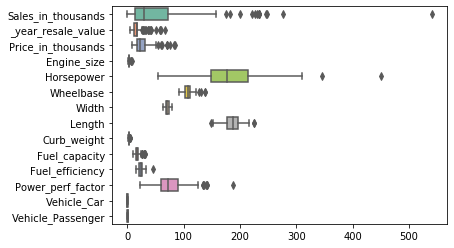

In [68]:
def lr():
    import seaborn as sns
    sns.boxplot(data=car_dummy, orient="h", palette="Set2")
    return None 
lr()

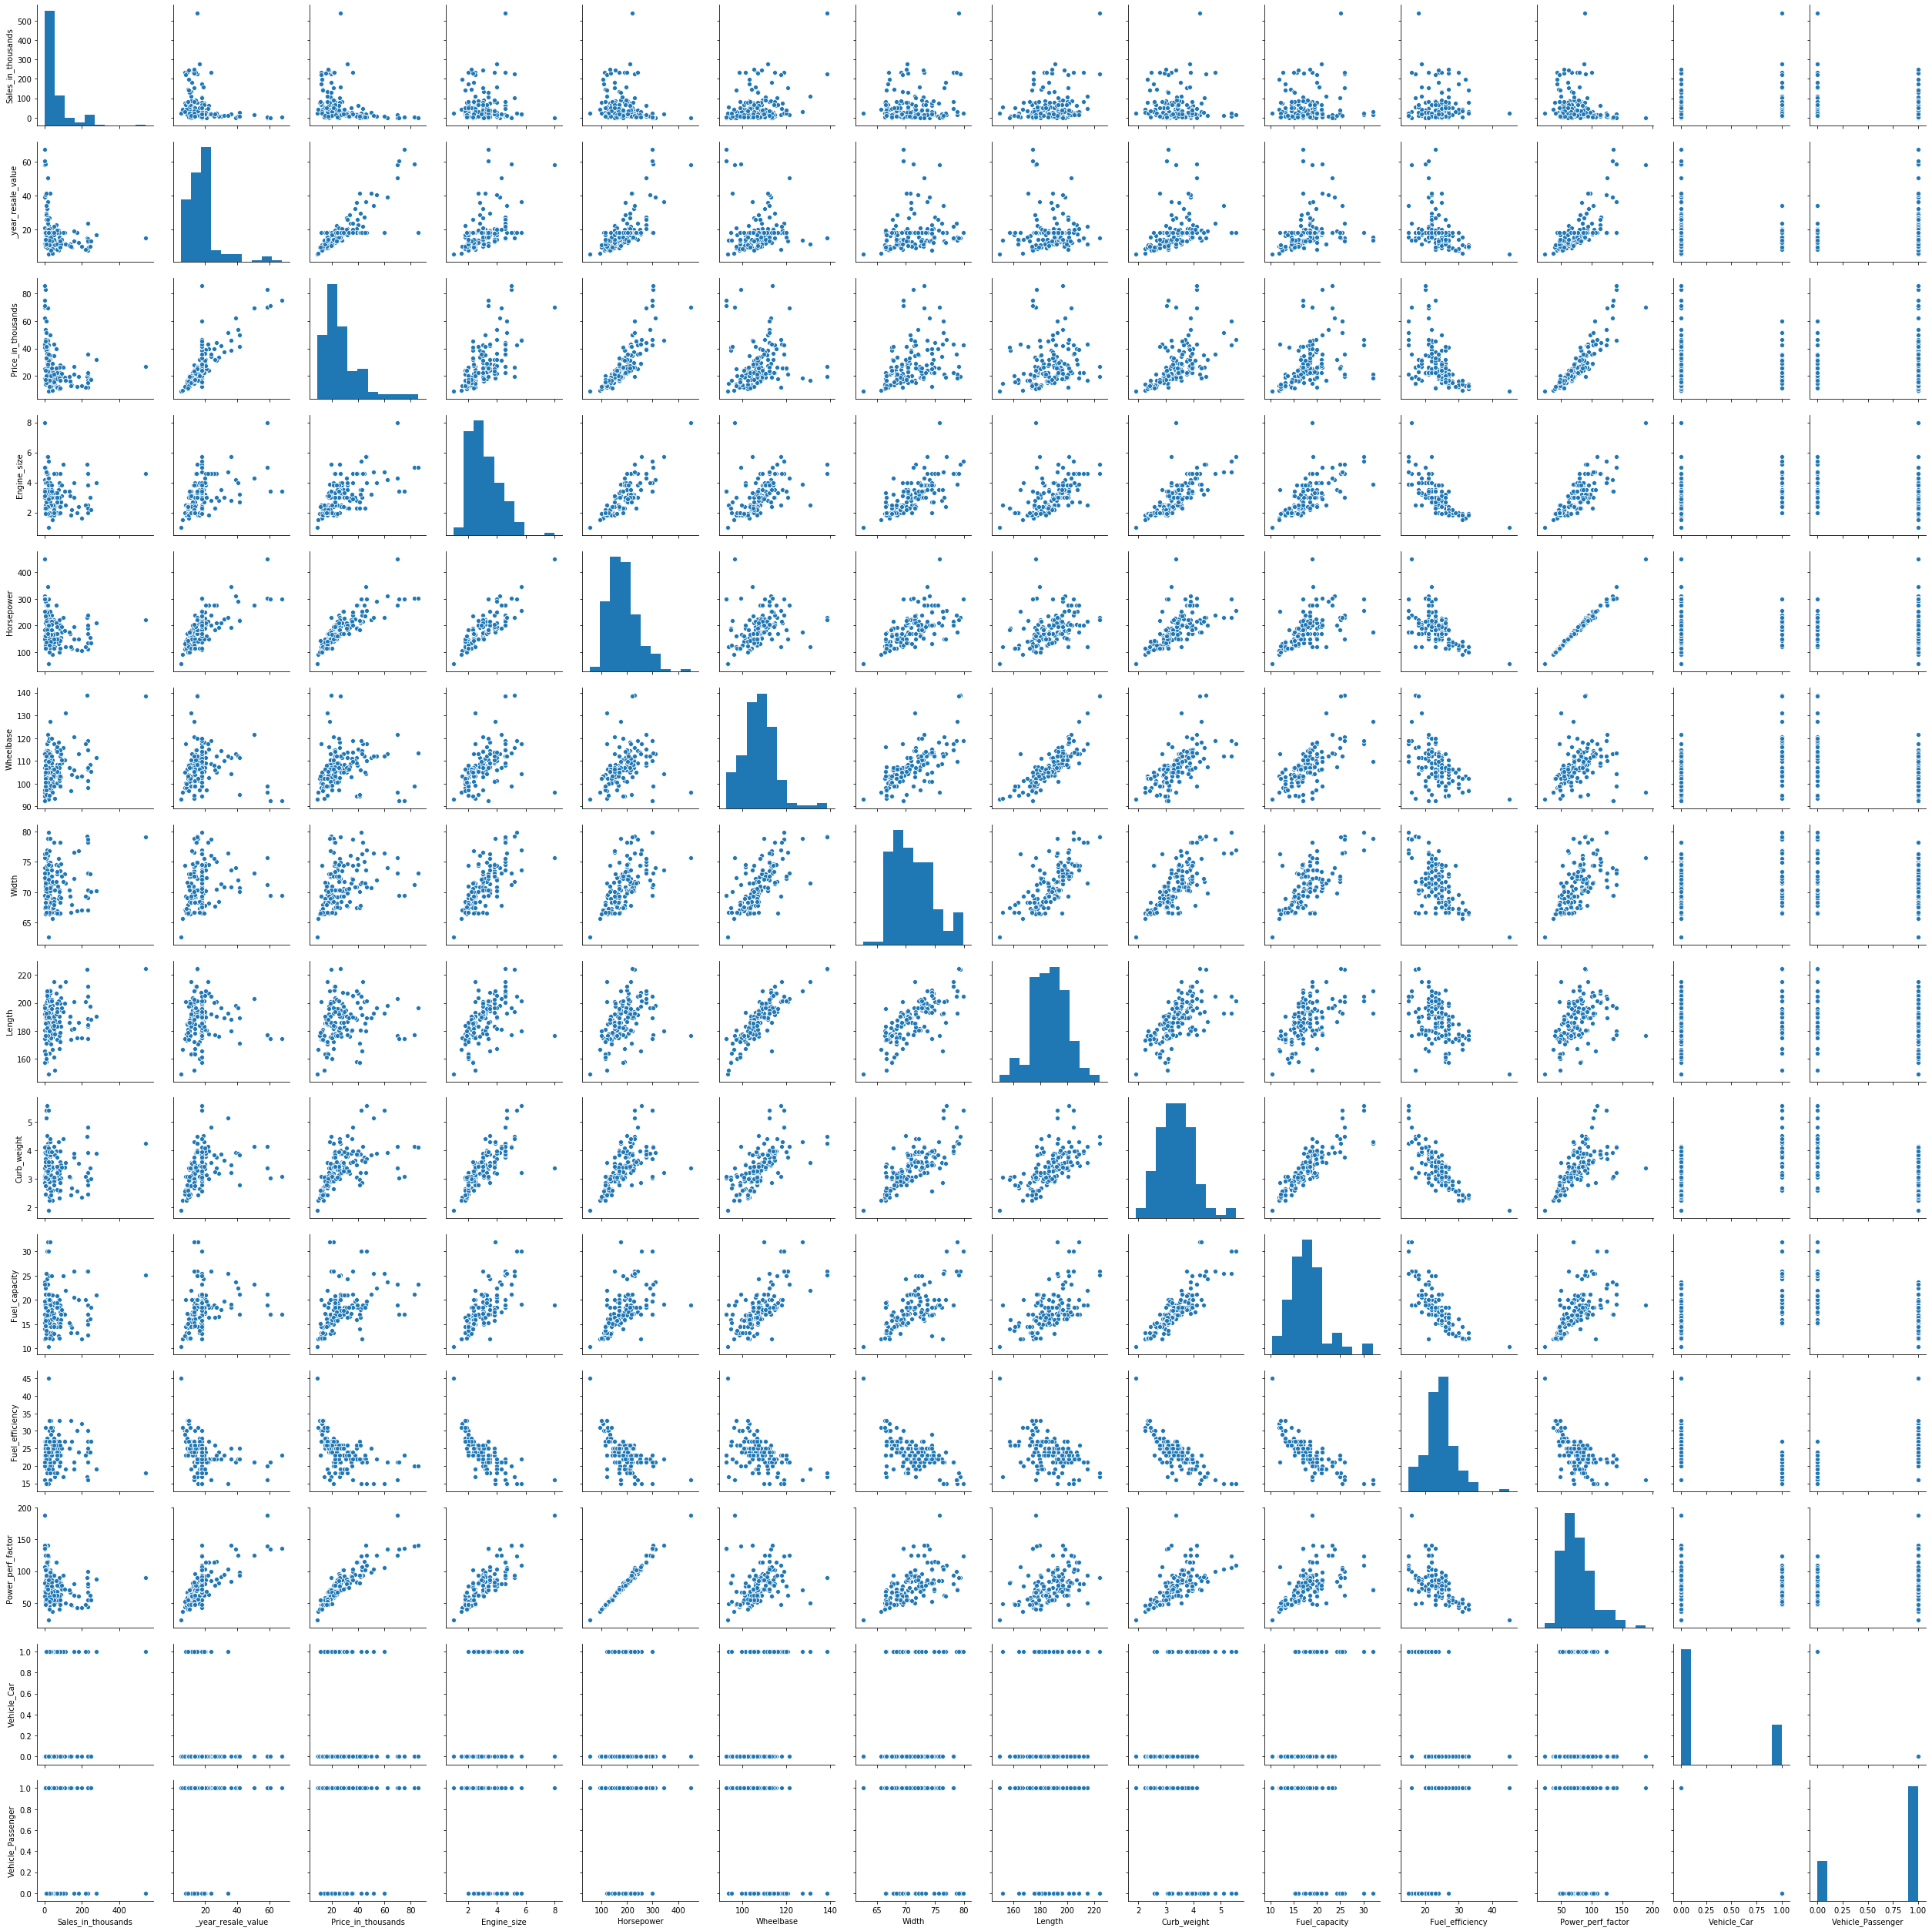

In [69]:
import seaborn as sns
sns.pairplot(data=car_dummy)

### Q 5. Calculate the Inter quantile range and then drop off outliers for quantile values outside 5 to 95 range.

In [74]:
import pandas as pd
def lr(car_dummy):
    
    # Calculate Q1 value using quantile(0.05)
    Q1=car_dummy.quantile(0.05)
    print(Q1)
    print("---------------")
    # Calculate Q3 value using quantile value (0.95)
    Q3=car_dummy.quantile(0.95)
    print(Q3)
    print("---------------")
    # Calculate Inter Quartile Range
    IQR=Q3-Q1
    print(IQR)
    print("---------------")
    # create a variable and check for outliers and drop them off
    car_out=car_dummy[~((car_dummy<(Q1-IQR))|(car_dummy>(Q3+IQR))).any(axis=1)]
    print(car_dummy[((car_dummy<(Q1-IQR))|(car_dummy>(Q3+IQR))).any(axis=1)])
    print("---------------")
    return car_out # your created variable
lr(car_dummy)
print(car_dummy.head())


#print (car_dummy)

Sales_in_thousands      1.870500
_year_resale_value      8.418750
Price_in_thousands     12.480000
Engine_size             1.800000
Horsepower            114.500000
Wheelbase              95.875000
Width                  66.500000
Length                163.675000
Curb_weight             2.423750
Fuel_capacity          12.500000
Fuel_efficiency        16.750000
Power_perf_factor      46.230556
Vehicle_Car             0.000000
Vehicle_Passenger       0.000000
Name: 0.05, dtype: float64
---------------
Sales_in_thousands    233.232500
_year_resale_value     39.343750
Price_in_thousands     55.530000
Engine_size             4.775000
Horsepower            300.000000
Wheelbase             119.250000
Width                  78.200000
Length                208.500000
Curb_weight             4.388750
Fuel_capacity          25.400000
Fuel_efficiency        31.000000
Power_perf_factor     125.078487
Vehicle_Car             1.000000
Vehicle_Passenger       1.000000
Name: 0.95, dtype: float64
------

### Q 6. Write code to standardize the variable for model building (return value will be numpy.ndarray).

In [82]:
#car_tmp=car_dummy
#car_tmp.drop(['Model'], axis=1, inplace=True)
car_tmp.drop(['Manufacturer'], axis=1, inplace=True)
car_tmp.head()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Vehicle_Car,Vehicle_Passenger
0,16.919,16.360,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150,0,1
1,39.384,19.875,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778,0,1
2,14.114,18.225,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000,0,1
3,8.588,29.725,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779,0,1
4,20.397,22.255,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639,0,1


In [0]:
car_modify = car_tmp.drop(car_tmp[['Sales_in_thousands']], axis=1)

In [0]:
car_modify = car_tmp.drop(car_tmp[['Latest_Launch']], axis=1)

In [91]:
#std = pd.DataFrame()

def lr(car_modify):
    from sklearn.preprocessing import StandardScaler
    print(car_modify.columns)
    # code to scale the variables
    # code to transform the variables and standardize them
    scaler = StandardScaler().fit(car_modify)
    data = scaler.transform(car_modify)
    return data# your created variable
std = lr(car_modify)
print(std[0:5])

Index(['Sales_in_thousands', '_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Vehicle_Car', 'Vehicle_Passenger'],
      dtype='object')
[[-0.54786572 -0.16960085 -0.41382164 -1.21088853 -0.81298837 -0.82543881
  -1.11892896 -1.11613994 -1.18221403 -1.22616352  0.98215105 -0.75384221
  -0.58722022  0.58722022]
 [-0.2472341   0.18033873  0.07005147  0.13358557  0.69094938  0.08045672
  -0.24703626  0.41500948  0.21770203 -0.19402264  0.27500229  0.56959669
  -0.58722022  0.58722022]
 [-0.58540285  0.01607122  0.11212739  0.13358557  0.69094938 -0.07709033
  -0.15984699  0.34778828  0.14276348 -0.19402264  0.51071855  0.52857136
  -0.58722022  0.58722022]
 [-0.659353    1.16096599  1.02377237  0.42168716  0.4255486   0.93383657
   0.07265772  0.69136328  0.7486497   0.01240554 -0.43214646  0.57035665
  -0.58722022  0.58722022]
 [-0.50132235 

### Q 7. Write a code to create a DataFrame from the standardized value calculated above

### Since the standardized value is a numpy array, add the data to a dataframe with column header as mentioned below in the same order

```['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger'] ```

In [93]:
columns = ['Sales_in_thousands', '_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Vehicle_Car', 'Vehicle_Passenger']

def lr(std):
    # create a dataframe cars for the numpy array
    cars=pd.DataFrame(std, columns=columns)
    print(cars.head())
    # assign the column headers with the columns mentioned above
    return cars
cars = lr(std)

   Sales_in_thousands  _year_resale_value  ...  Vehicle_Car  Vehicle_Passenger
0           -0.547866           -0.169601  ...     -0.58722            0.58722
1           -0.247234            0.180339  ...     -0.58722            0.58722
2           -0.585403            0.016071  ...     -0.58722            0.58722
3           -0.659353            1.160966  ...     -0.58722            0.58722
4           -0.501322            0.417282  ...     -0.58722            0.58722

[5 rows x 14 columns]


### Q 8: Now since all variable may not be of use, please extract only the following variables for training. Preparing X (independent features) for the model building.

```['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']```

In [98]:
#X = pd.DataFrame()     
feature_cols = ['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_Passenger']             
def lr(cars):
    # assign values of fature_cols to X
    print(cars.head())
    X=cars[feature_cols]
    return X
X = lr(cars)
print(X)

   Sales_in_thousands  _year_resale_value  ...  Vehicle_Car  Vehicle_Passenger
0           -0.547866           -0.169601  ...     -0.58722            0.58722
1           -0.247234            0.180339  ...     -0.58722            0.58722
2           -0.585403            0.016071  ...     -0.58722            0.58722
3           -0.659353            1.160966  ...     -0.58722            0.58722
4           -0.501322            0.417282  ...     -0.58722            0.58722

[5 rows x 14 columns]
     Price_in_thousands  Engine_size  ...  Fuel_efficiency  Vehicle_Passenger
0             -0.413822    -1.210889  ...         0.982151            0.58722
1              0.070051     0.133586  ...         0.275002            0.58722
2              0.112127     0.133586  ...         0.510719            0.58722
3              1.023772     0.421687  ...        -0.432146            0.58722
4             -0.239207    -1.210889  ...         0.746435            0.58722
..                  ...          ..

### Check for the type and shape of X.

In [99]:
def lr():
    print(type(X))
    print(X.shape)
lr()

<class 'pandas.core.frame.DataFrame'>
(156, 5)


### Q 9. Extract y (dependent variable) for model building.
```['Sales_in_thousands']```

In [101]:
y = pd.DataFrame()
def lr(car_dummy):
    # assign the dependent variable to y dataframe
    Y=car_dummy.Sales_in_thousands
    return Y #your dataframe
y = lr(car_dummy)
print(y.head())

0    16.919
1    39.384
2    14.114
3     8.588
4    20.397
Name: Sales_in_thousands, dtype: float64


### Check for the type and shape of y. 

In [103]:
def lr():
    print(type(y))
    print(y.shape)
lr()

<class 'pandas.core.series.Series'>
(156,)


<a id=section403></a>

### Q 10. Split the value of X and y into train and test datasets.

In [0]:
from sklearn.model_selection import train_test_split

def lr(X, y):
        # train test split using train test split of 70:30 and random state=1
    return train_test_split(X, y, test_size=0.30, random_state=1)

X_train, X_test, y_train, y_test = lr(X, y)

### Check the shape of  X and y of train dataset.

In [106]:
def lr():
    print(X_train.shape)
    print(y_train.shape)
lr()

(109, 5)
(109,)


### Check the shape of X and y of test dataset.

In [107]:
def lr():
    print(X_test.shape)
    print(y_test.shape)
lr()

(47, 5)
(47,)


<a id=section404></a>

### Q 11. Instantiate Linear regression model using scikit-learn

In [108]:
from sklearn.linear_model import LinearRegression
def lr():
    #initiate the linear regression model to new variable linreg
    linreg = LinearRegression()
    return linreg
linreg = lr()
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Q12. Fit the linear model on X_train and y_train.

In [0]:
def lr():
    # fit the X_train and y_train
    linreg.fit(X_train, y_train)
    # We don't expect any return from your side.
lr()

<a id=section405></a>

### Q 13. Interpret the Model Coefficients.

In [110]:
def lr():
    # print the linreg.intercet
    print(linreg.intercept_)
    # print the linreg.coefficient
    print(linreg.coef_)
lr()

54.131815762077856
[-47.39155816  23.9552675   26.18461633   7.42050911   1.45955044]


### Q.14 Zip the features to pair the feature names with the coefficients.

In [114]:
feature_cols = ['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_Passenger'] 
feature_cols

['Price_in_thousands',
 'Engine_size',
 'Wheelbase',
 'Fuel_efficiency',
 'Vehicle_Passenger']

In [115]:
def lr():
    # insert Intercept variable with the feature_cols
    feature_cols.insert(0, 'Intercept')
    print(feature_cols)
    # make a list using linreg.coef
    # insert the intercept value respectively
    coef = linreg.coef_.tolist()
    coef.insert(0, linreg.intercept_)
    print(coef)
    # creating a variable to zip feature_cols and their coef.
    # use for loop the get the value of feature_cols and their coef
        # print the above values
    print("------------")
    eq1 = zip(feature_cols, coef)

    for c1,c2 in eq1:
      print(c1,c2)
lr()

['Intercept', 'Price_in_thousands', 'Engine_size', 'Wheelbase', 'Fuel_efficiency', 'Vehicle_Passenger']
[54.131815762077856, -47.39155816175155, 23.955267496291334, 26.184616331437933, 7.420509111016267, 1.4595504410773368]
------------
Intercept 54.131815762077856
Price_in_thousands -47.39155816175155
Engine_size 23.955267496291334
Wheelbase 26.184616331437933
Fuel_efficiency 7.420509111016267
Vehicle_Passenger 1.4595504410773368


###  Q 15. Predict the train value using the built model.

In [117]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def lr():  
    # provide column header as sales for pred
    pred.columns=['Sales']
    head=pred.head()
    # check for head 
    return head
head=lr()
head

,Sales
0,38.303910
1,53.464762
2,78.873722
3,68.770694
4,88.987056


### Q 16. Predict the test value using the built model.

In [118]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def lr():
    # provide column header as sales for pred
    pred_test.columns=['Sales']
    head=pred_test.head()
    # check for head 
    return head
head=lr()
head

,Sales
0,52.925538
1,53.576349
2,63.883763
3,74.179797
4,57.128084


<a id=section406></a>

### Q 17 Evaluate the model using Mean Absolute Error metrics for both train and test.

In [120]:
from sklearn import metrics
def lr():
    # Calculate MAE for train 
    # Calculate MAE for test 
    # print MAE for train
    # print MAE for test
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
lr()

MAE for training set is 42.949391239745964
MAE for test set is 47.822199851328016


### Q 18 Evaluate the model using Mean Squared Error for both train and test.

In [121]:
def lr():
    # Calculate MSE for train 
    # Calculate MSE for test 
    # print MSE for train
    # print MSE for test
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
lr()

MSE for training set is 4308.1794966654
MSE for test set is 4510.696044141733


### Q 19 Evaluate the model using Root Mean Squared Error for both train and test.

In [122]:
import numpy as np
def lr():
    # Calculate RMSE for train 
    # Calculate RMSE for test 
    # print RMSE for train
    # print RMSE for test
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 65.63672368929912
RMSE for test set is 67.16171561344851


### Q 20. Evaluate the model using R-square value for both train and test.

In [123]:
from sklearn.metrics import r2_score
def lr():
    # Calculate r2 for train 
    # Calculate r2 for test 
    # print r2 for train
    # print r2 for test
    yhat = linreg.predict(X_train)
    SS_Residual = sum((y_train-yhat)**2)
    SS_Total = sum((y_train-np.mean(y_train))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    print(r_squared, adjusted_r_squared)
lr()

0.2907892639191675 0.2563615582841756
